# 0.0 Imports

In [3]:
import inflection
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display    import HTML
from ydata_profiling    import ProfileReport

## 0.1 Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings()

## 0.2 Load Dataset

In [5]:
df_raw = pd.read_csv('../datasets/df_ready.csv')

In [6]:
df_raw.head()

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,Disc_percentage,isSale,Imp_count,brand,p_description,currency,dateAdded,dateSeen,dateUpdated,imageURLs,manufacturer,shipping,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,New,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.001525,3.880725
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.760844,3.880725
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Value,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.523722,3.880725
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253107,3.880725


# 1.0 Descrição dos Dados

In [7]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [8]:
df1.columns

Index(['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
       'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1',
       'price_std'],
      dtype='object')

In [9]:
cols_old = ['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
       'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1',
       'price_std']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map (snakecase, cols_old))

df1.columns = cols_new

## 1.2 Data dimensions

In [10]:
print ('Nmber of rows: {}'.format(df1.shape[0]))
print ('Nmber of columns: {}'.format(df1.shape[1]))

Nmber of rows: 23151
Nmber of columns: 32


## 1.3 Data Types

In [11]:
df1.dtypes

unnamed: 0           int64
date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
condition           object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
image_ur_ls         object
manufacturer        object
shipping            object
source_ur_ls        object
weight              object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
zscore_1           float64
price_std          float64
dtype: object

## 1.4 Check NA's

In [12]:
df1.isna().sum()

unnamed: 0             0
date_imp               0
date_imp_d             0
cluster                0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
condition              0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
currency               0
date_added             0
date_seen              0
date_updated           0
image_ur_ls        22696
manufacturer       10639
shipping           11497
source_ur_ls        4930
weight                68
date_imp_d.1           0
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
zscore_1             171
price_std              0
dtype: int64

## 1.5 Repace NA

In [13]:
# Remover as colunas que tem NA
cols = ['image_ur_ls', 'manufacturer', 'shipping', 'source_ur_ls', 'weight', 'zscore_1']

df1 = df1.drop(columns=cols)

In [14]:
# day_n, month_n, date_added, date_seen, date_updated, date_imp_d.1


## 1.6 Change dtypes

In [15]:
df1.dtypes

unnamed: 0           int64
date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
condition           object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
price_std          float64
dtype: object

In [16]:
# invoice date
df1['date_imp'] = pd.to_datetime(df1['date_imp'], errors='coerce')
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'], errors='coerce')
df1['date_added'] = pd.to_datetime(df1['date_added'], errors='coerce')
df1['date_seen'] = pd.to_datetime(df1['date_seen'], errors='coerce')
df1['date_updated'] = pd.to_datetime(df1['date_updated'], errors='coerce')
df1['date_imp_d.1'] = pd.to_datetime(df1['date_imp_d.1'], errors='coerce')

## 1.7 Descriptive Statistis

In [17]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]', 'datetime64[ns, UTC]'])

### 1.7.1 Numerical Attributes

In [18]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m= pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,unnamed: 0,4.000000,29592.000000,29588.000000,15338.318431,15613.000000,8528.621434,-0.071744,-1.202816
1,cluster,0.000000,57.000000,57.000000,22.682735,20.000000,15.576482,0.312318,-1.010301
2,price,1.000000,10879.950000,10878.950000,513.037803,199.990000,859.091448,4.595160,34.411146
3,disc_price,1.000000,10879.950000,10878.950000,494.104295,199.000000,808.571509,4.748349,39.612839
4,disc_percentage,0.000000,0.800000,0.800000,0.016933,0.000000,0.077847,5.217632,28.754920
5,imp_count,1.000000,31.000000,30.000000,6.560926,5.000000,5.403049,1.286351,1.639569
6,month,1.000000,12.000000,11.000000,7.651030,8.000000,2.592787,-0.099417,-0.628859
7,day,1.000000,31.000000,30.000000,15.693879,16.000000,9.681413,0.032258,-1.331838
8,week_number,1.000000,51.000000,50.000000,31.342750,32.000000,11.316253,-0.266980,-0.648027
9,price_std,0.004472,1423.902118,1423.897646,61.992819,18.764962,125.492418,4.857793,30.958918


# 2.0 Filtragem de Variáveis

In [19]:
df2 = df1.copy()

In [20]:
# Removendo alguns valores de data

cols = ['date_imp', 'date_added', 'date_seen', 'date_updated', 'date_imp_d.1']

df2 = df2.drop(columns=cols)

In [21]:
df2.head(2)

,unnamed: 0,date_imp_d,cluster,category_name,name,price,disc_price,merchant,condition,disc_percentage,is_sale,imp_count,brand,p_description,currency,day_n,month,month_n,day,week_number,price_std
0,4,2017-12-14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,New,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,Thursday,12,December,14,50,3.880725
1,5,2017-09-08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,69.00,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,Friday,9,September,8,36,3.880725


# 3.0 Feature Engineering

In [22]:
df3 = df2.copy()

# 4.0 EDA (Exploratory Data Analysis)

In [23]:
df4 = df3.copy()

In [24]:
# profile = ProfileReport(df4)
# profile.to_file('../reports/output_v1.html')

In [25]:
# Só existe a currency USD então pode tirar essa coluna
# Só existe a condition New então pode tirar essa coluna

- Qual Merchant que mais vendeu?
- Qual categoria mais vendida?
- Qual marca mais vendida?
- Quais os dias que mais vendem?
- Quais os meses que mais vendem?
- QUais as semanas que mais vendem?

### 4.1.1 Merchant que mais vendeu

Text(0.5, 0, 'Merchant')

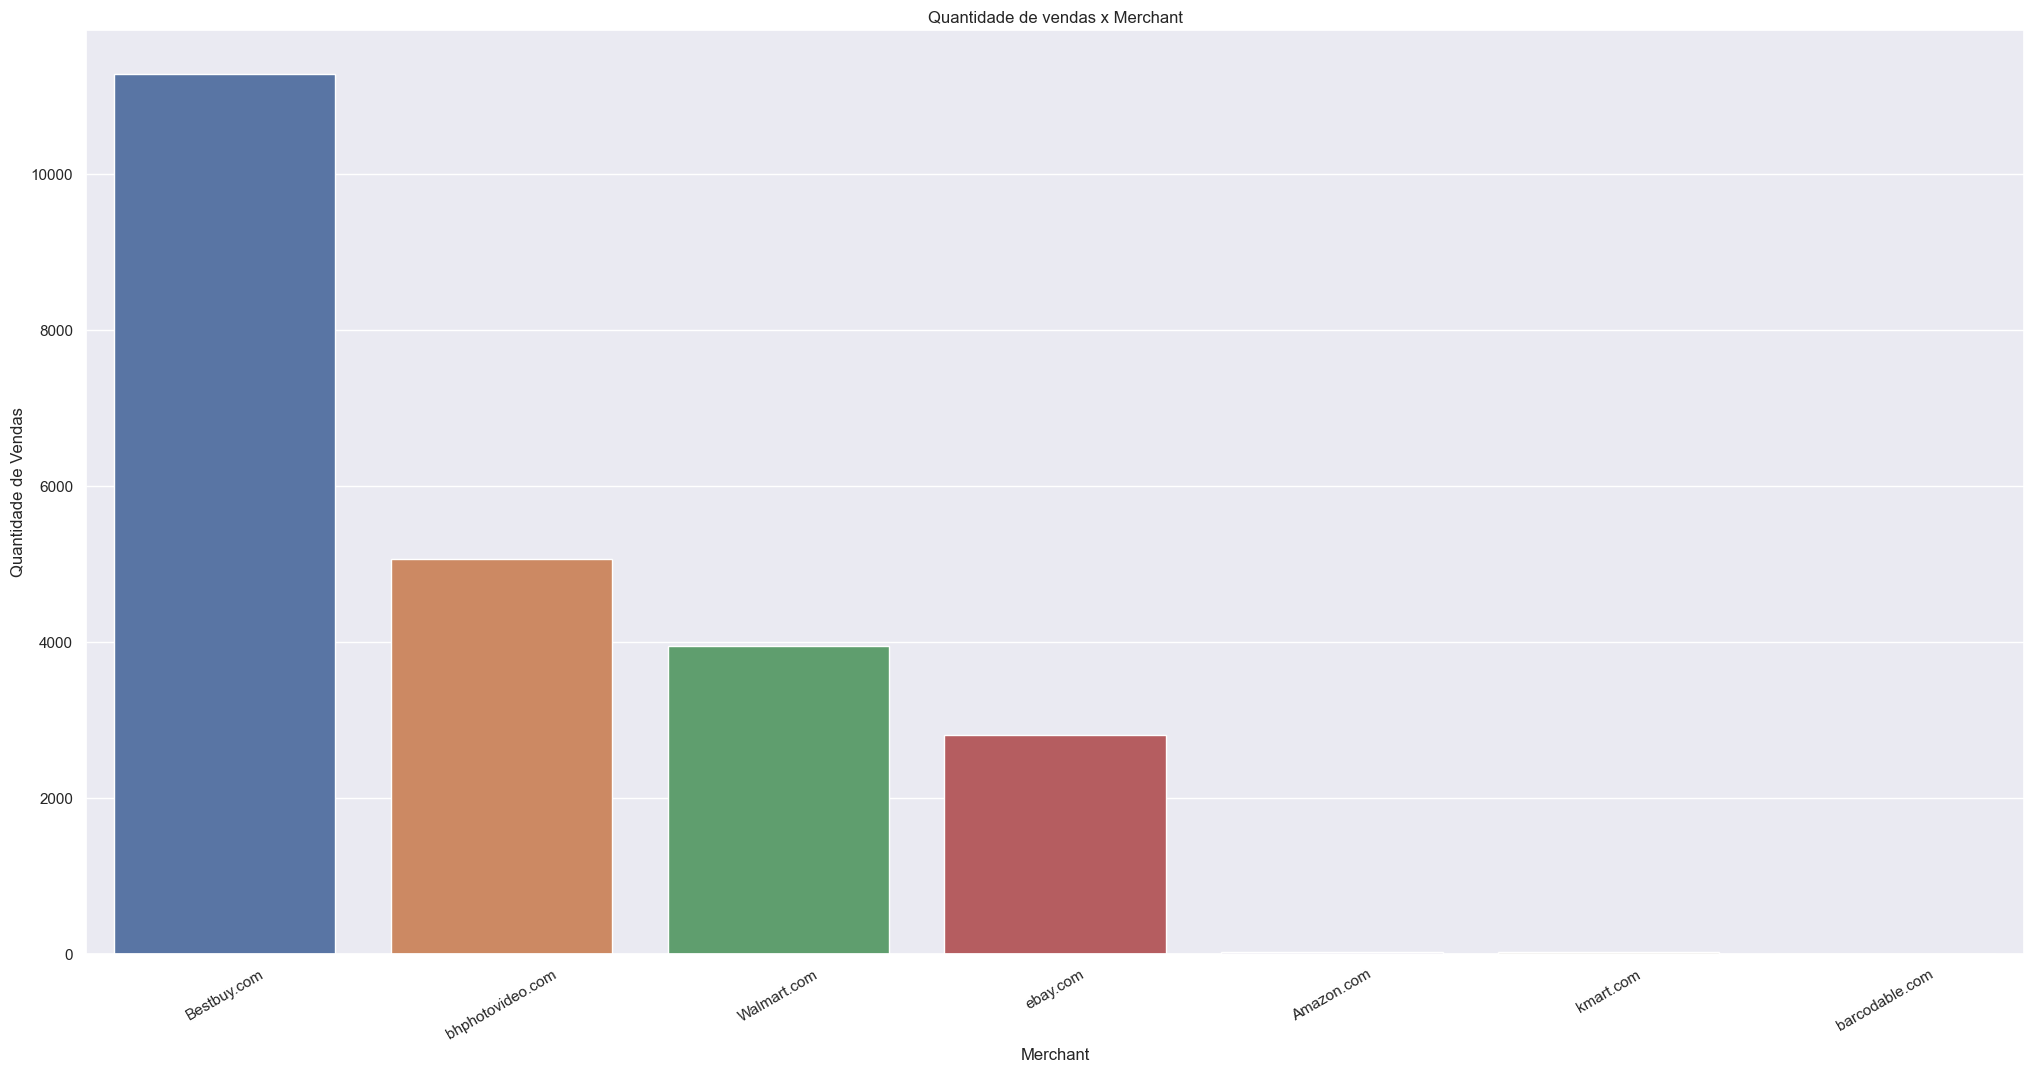

In [26]:
# Qual Merchant mais vendeu?
# Answer: BestBuy
aux = df4[['date_imp_d', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp_d', data=aux, hue='merchant')
plt.title('Quantidade de vendas x Merchant')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Merchant')


### 4.1.2 Categoria que mais vendeu

In [27]:
# Seleção de Lojas
df_best = df4[df4['merchant'] == 'Bestbuy.com']
df_bhphoto = df4[df4['merchant'] == 'bhphotovideo.com']
df_walmart = df4[df4['merchant'] == 'Walmart.com']
df_ebay = df4[df4['merchant'] == 'ebay.com']

Text(0.5, 0, 'Category Name')

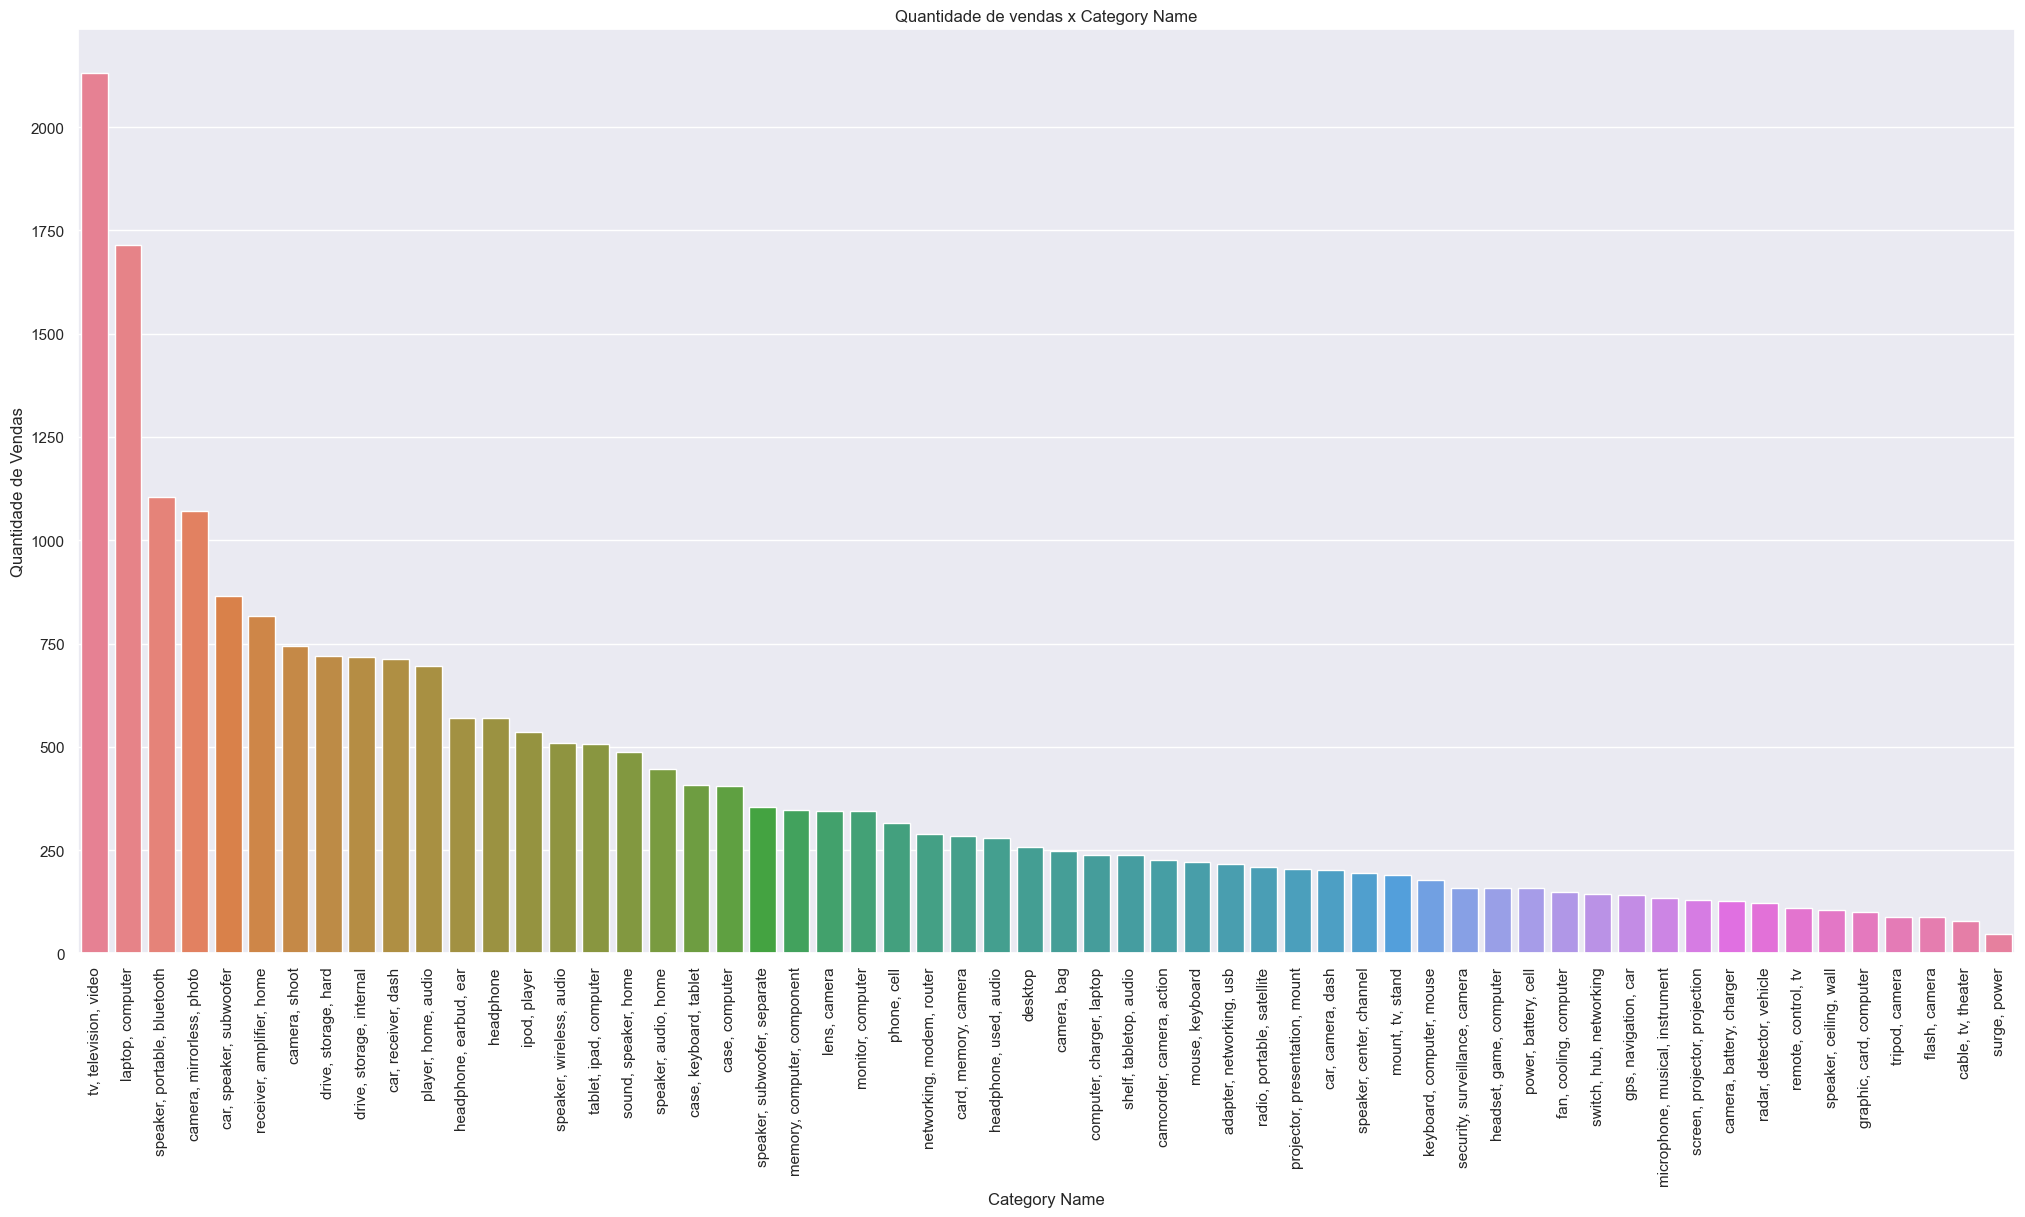

In [28]:
# Categorias mais vendidas
aux = df4[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux, hue='category_name')
plt.title('Quantidade de vendas x Category Name')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Category Name')

#### 4.1.2.1 Categorias que mais venderam por loja

Text(0.5, 0, 'Category Name')

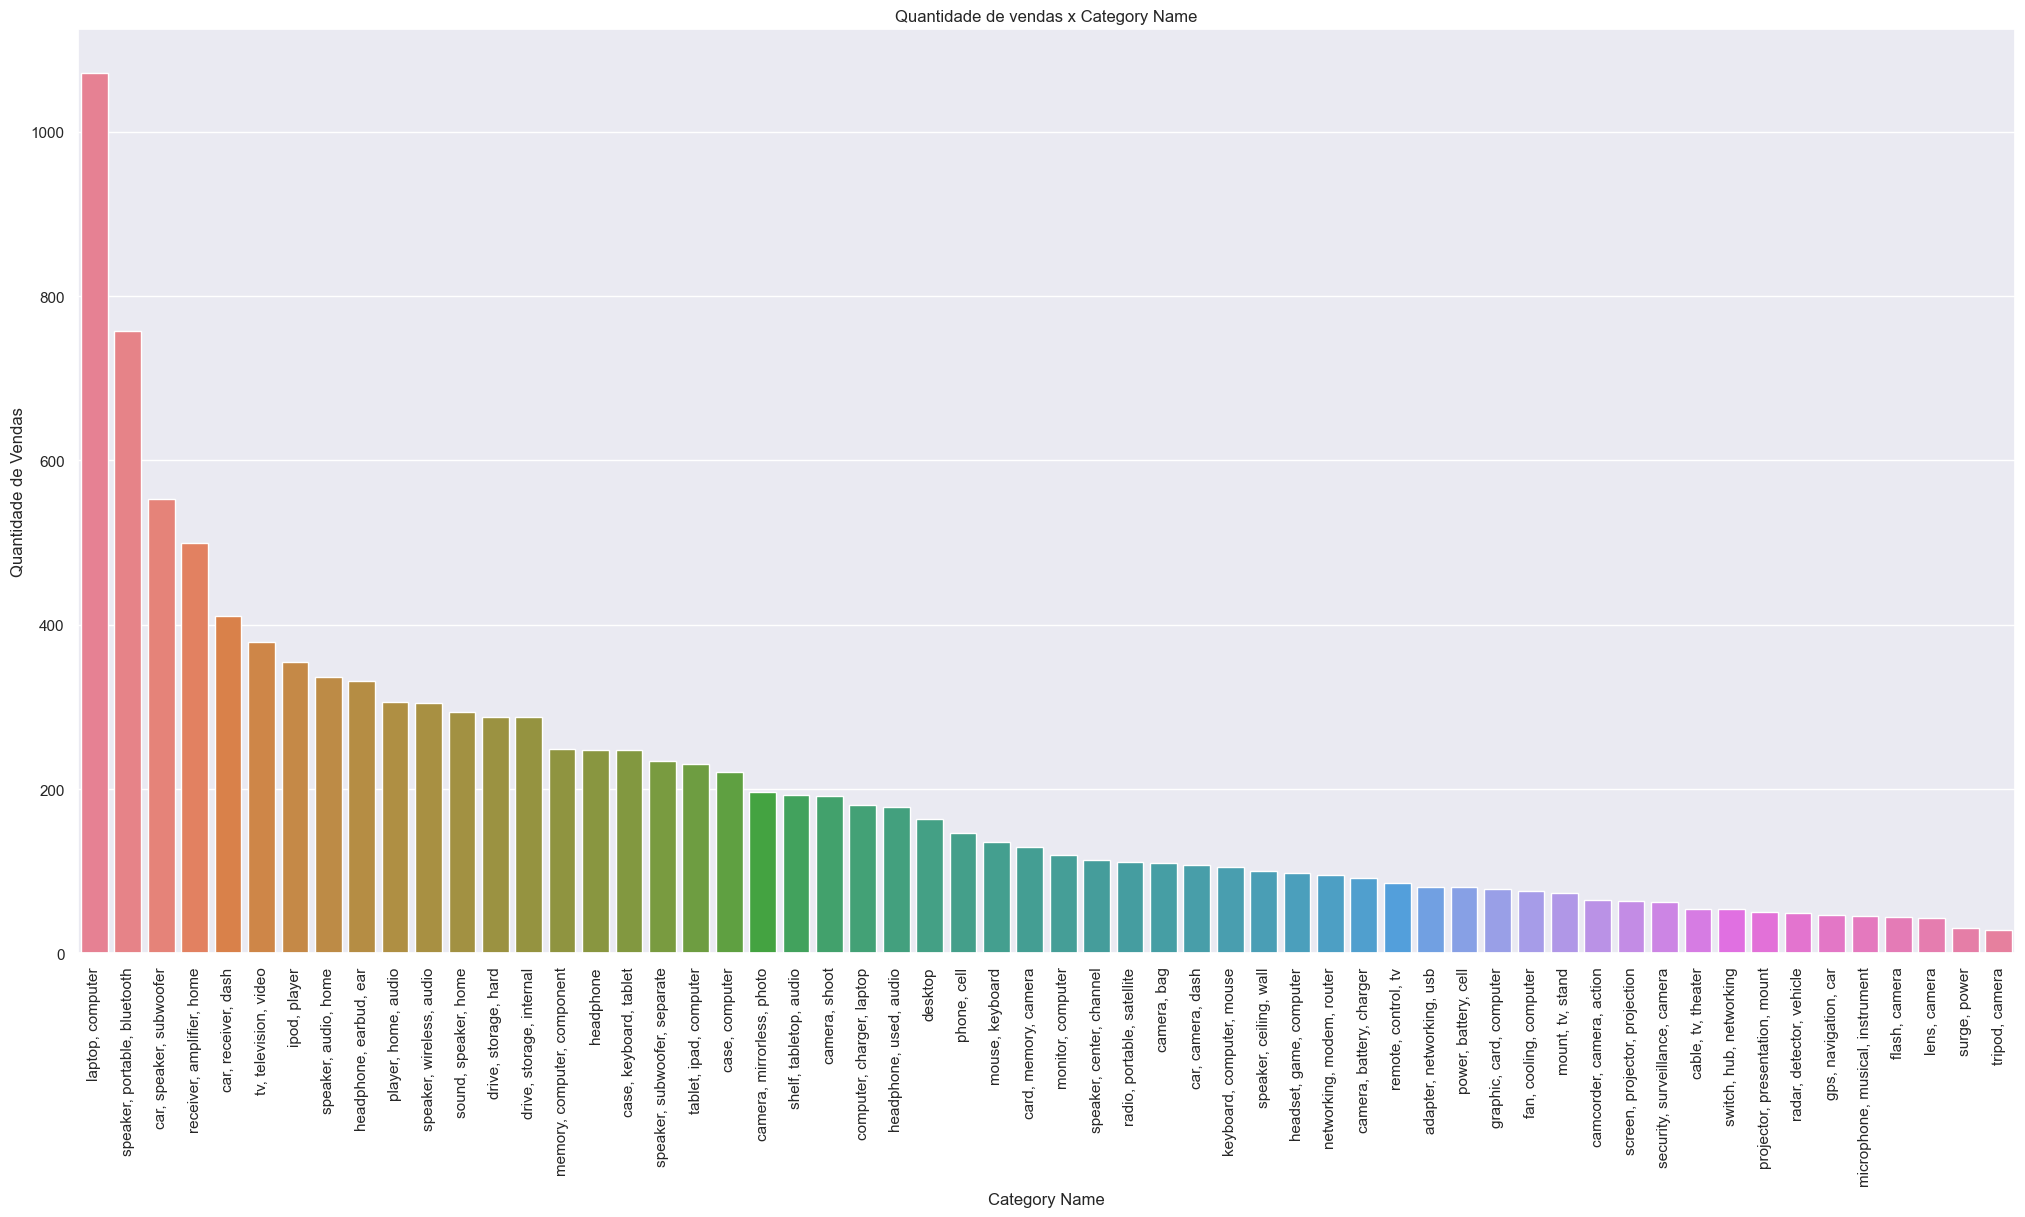

In [29]:
# Categorias mais vendidas na Bestbuy
aux = df_best[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux, hue='category_name')
plt.title('Quantidade de vendas x Category Name')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Category Name')

Text(0.5, 0, 'Category Name')

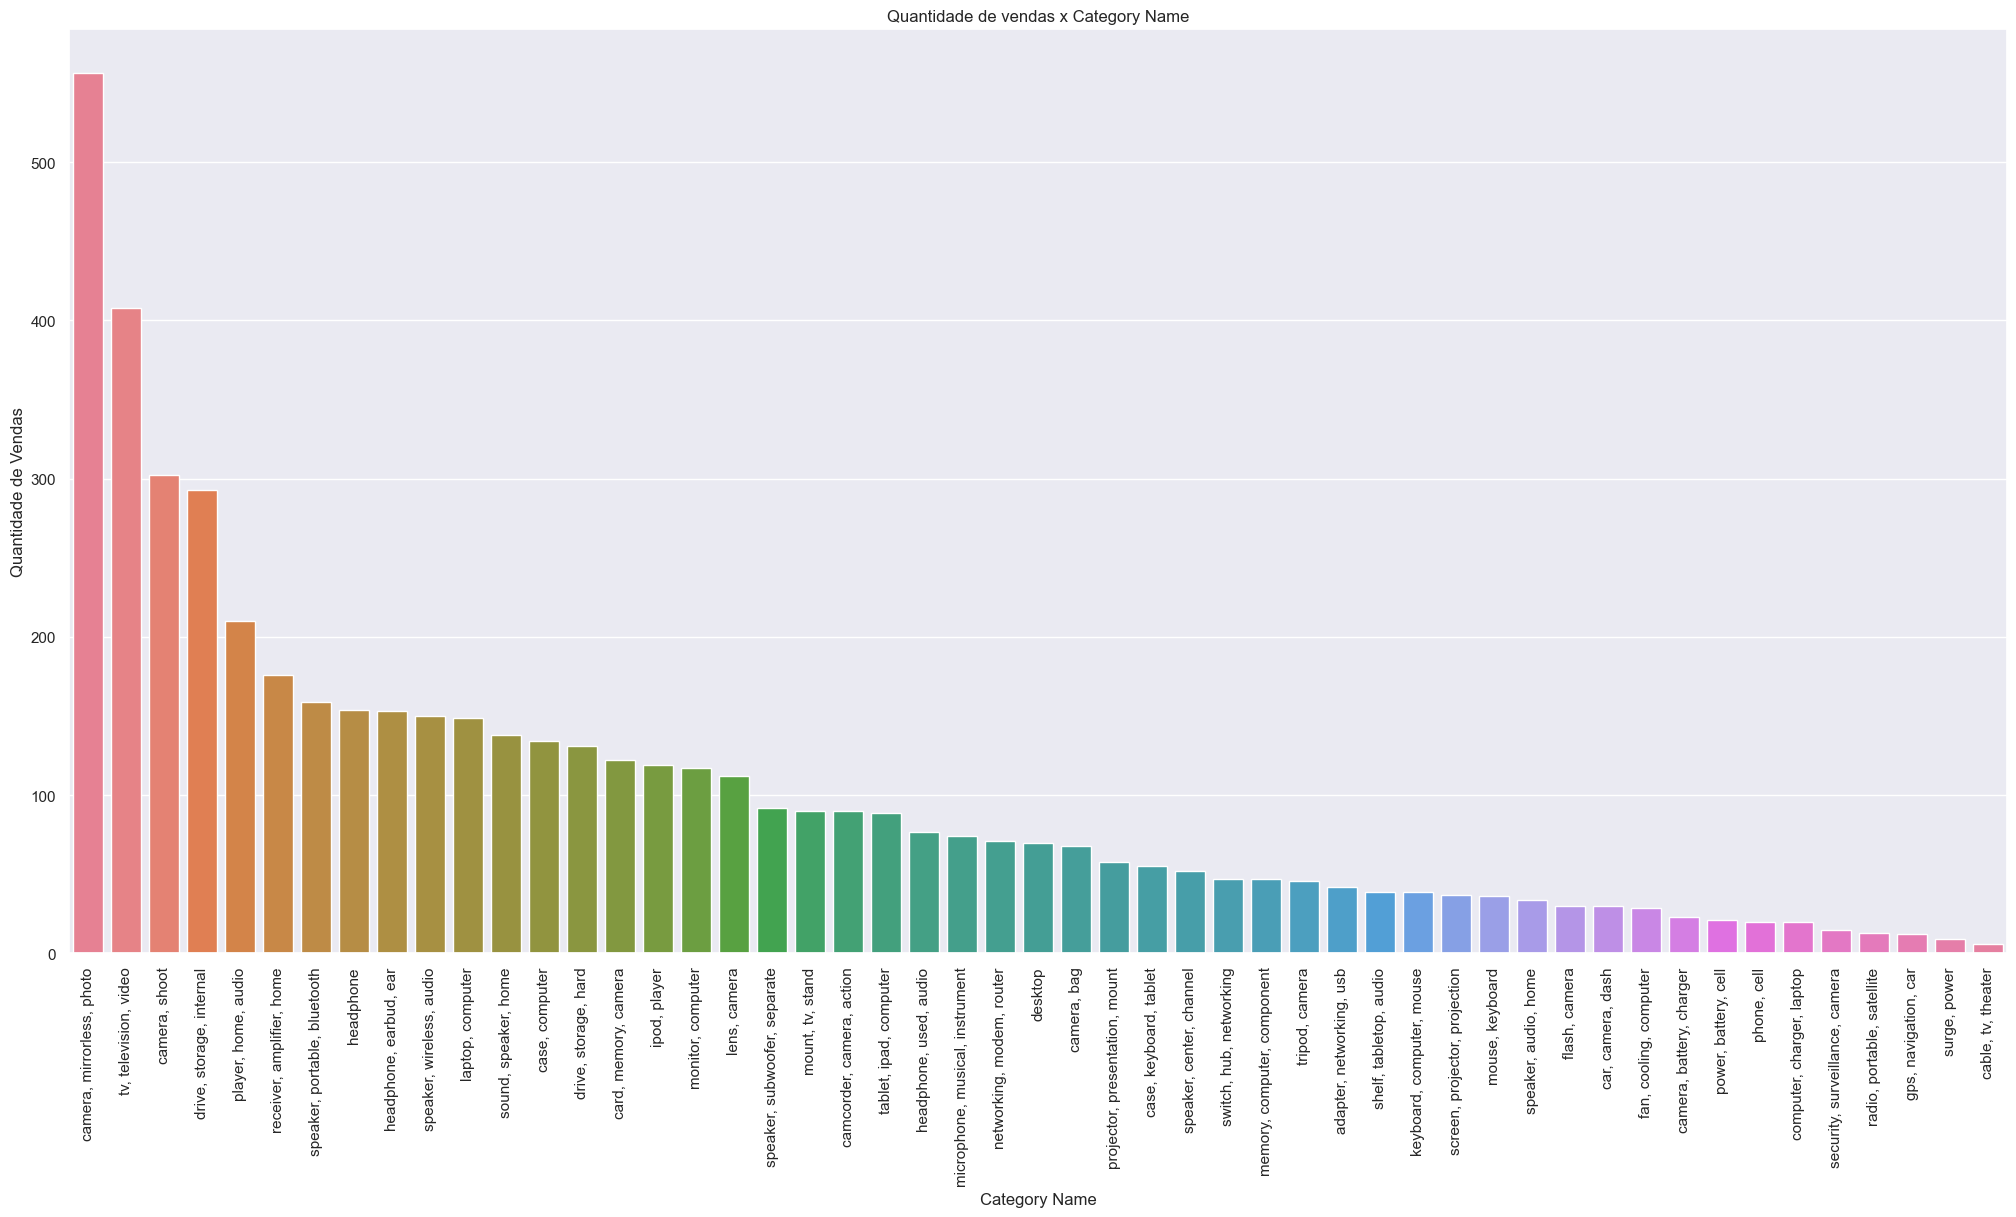

In [30]:
# Categorias mais vendidas na Bhphotovideo
aux = df_bhphoto[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux, hue='category_name')
plt.title('Quantidade de vendas x Category Name')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Category Name')

Text(0.5, 0, 'Category Name')

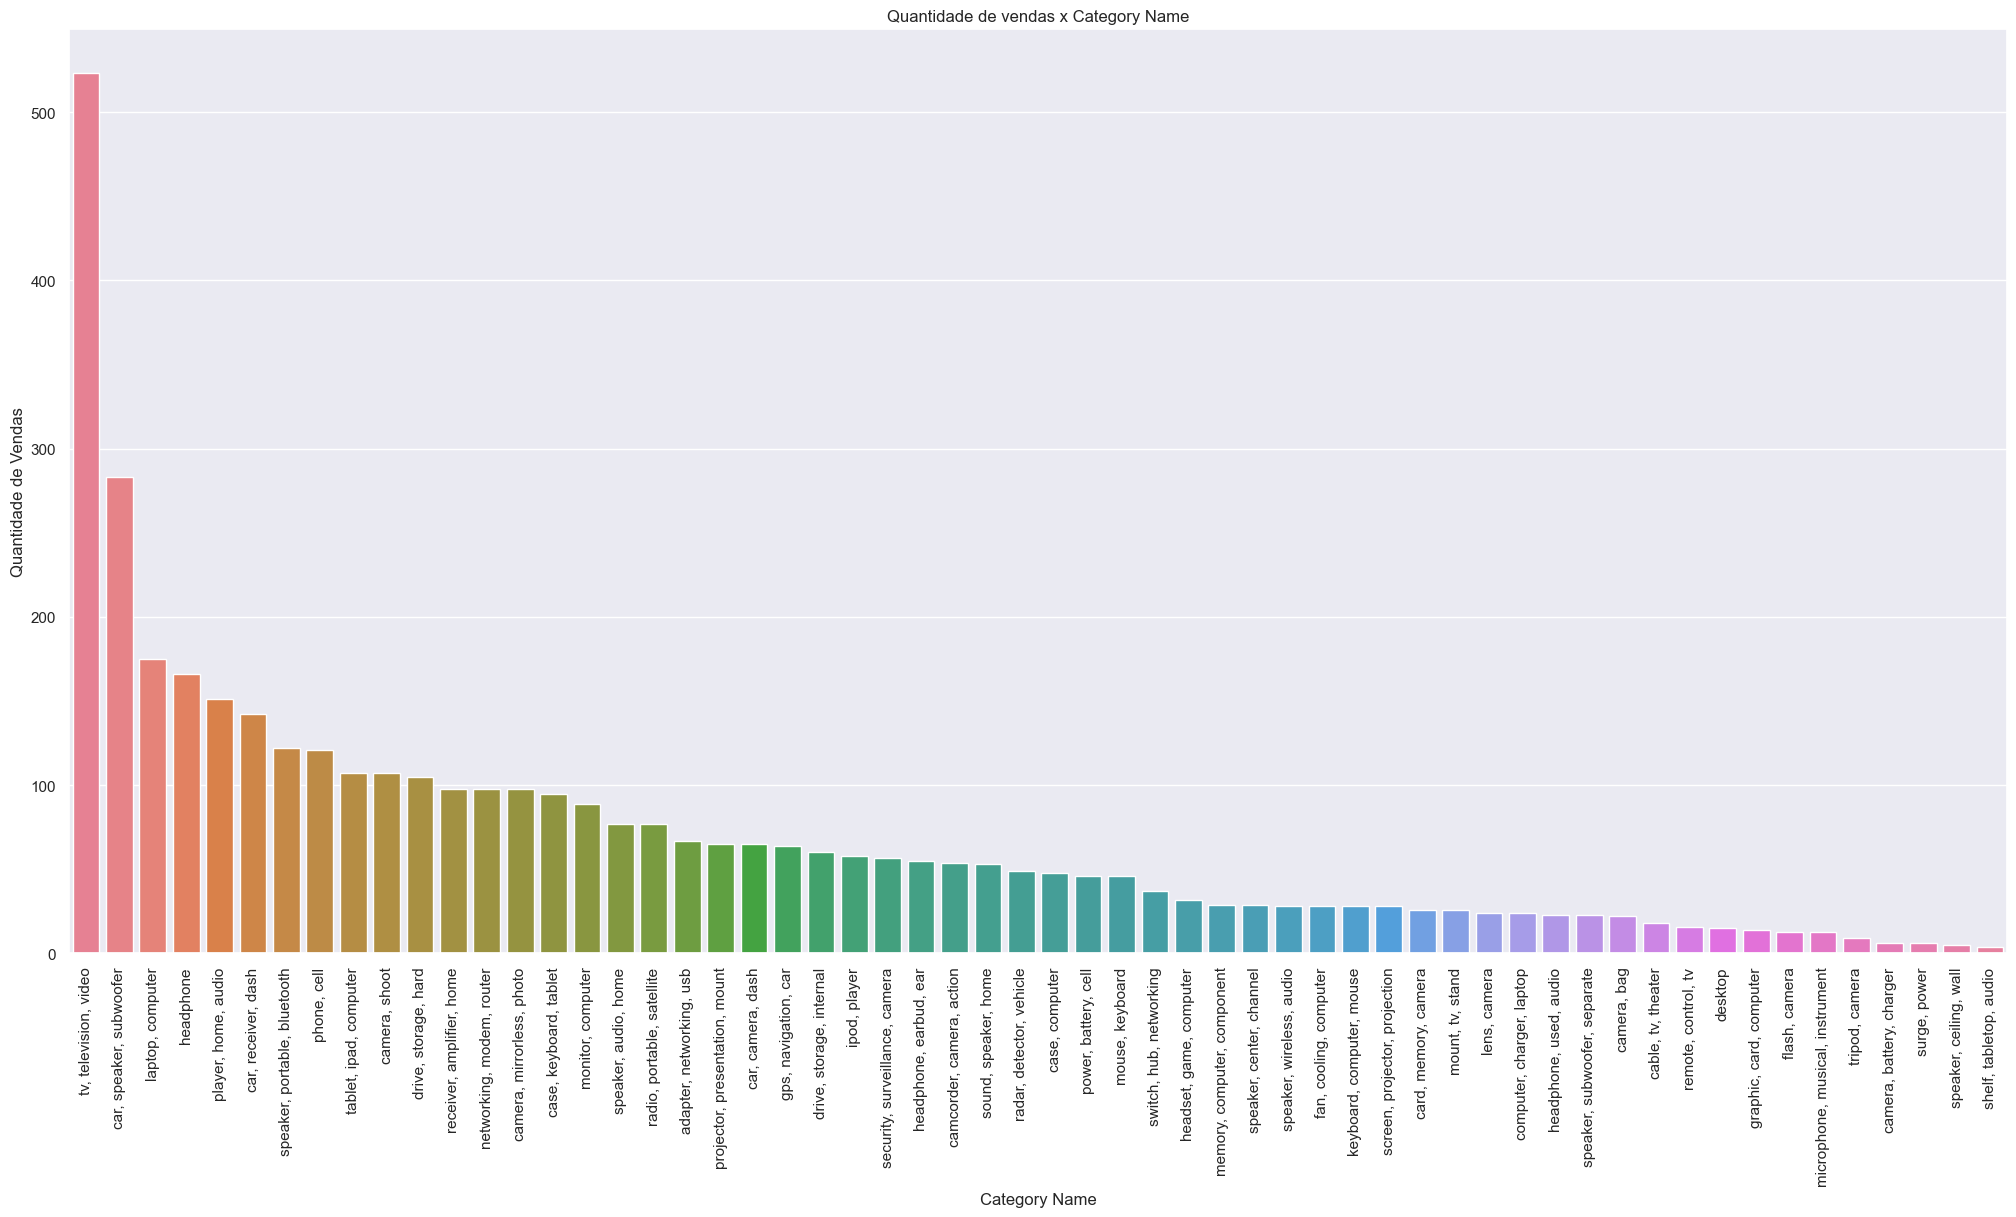

In [31]:
# Categorias mais vendidas na Bhphotovideo
aux = df_walmart[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux, hue='category_name')
plt.title('Quantidade de vendas x Category Name')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Category Name')

Text(0.5, 0, 'Category Name')

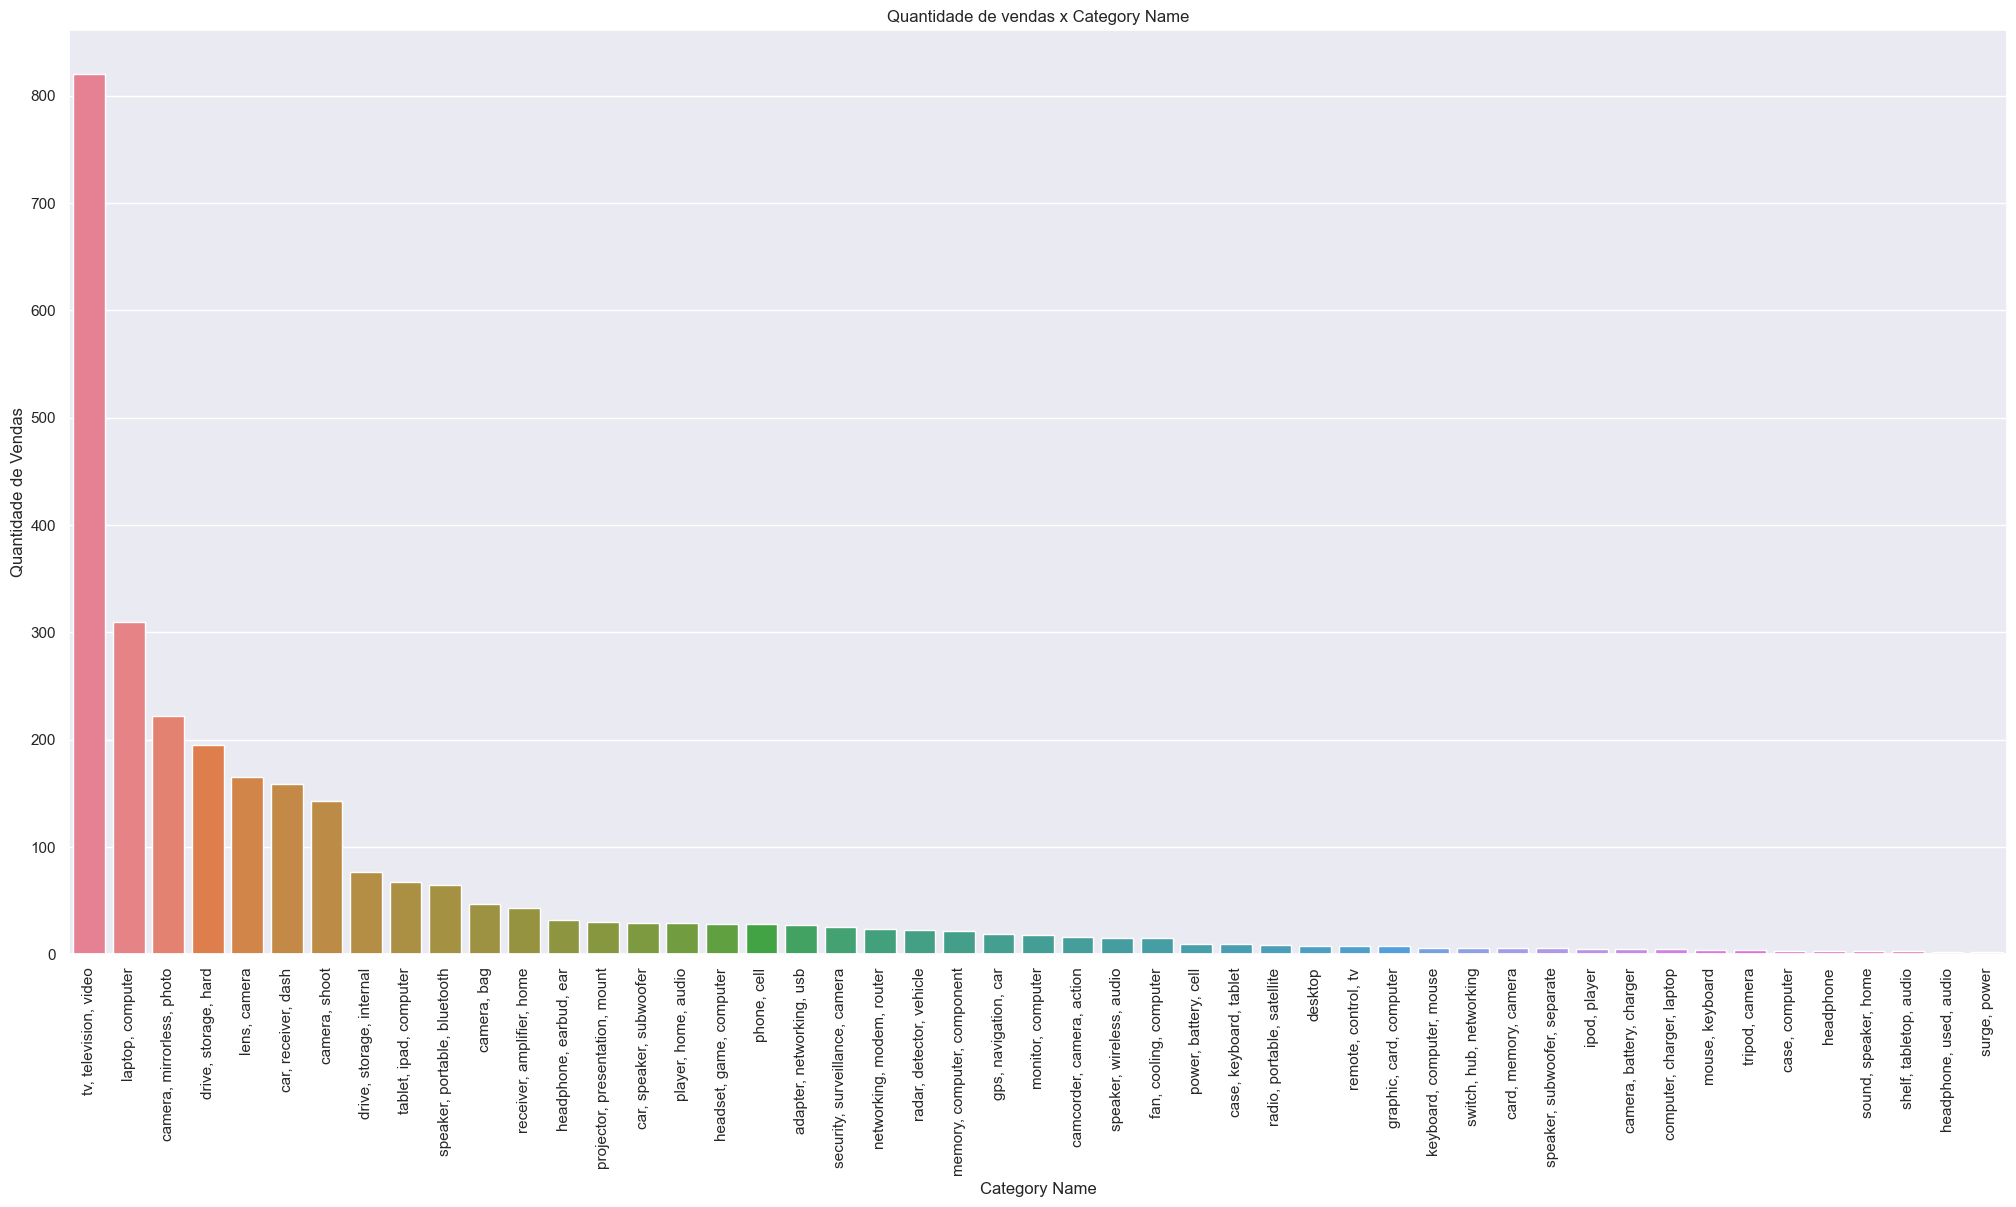

In [32]:
# Categorias mais vendidas na Bhphotovideo
aux = df_ebay[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux, hue='category_name')
plt.title('Quantidade de vendas x Category Name')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Category Name')

### 4.1.3 Qual a marca mais vendida

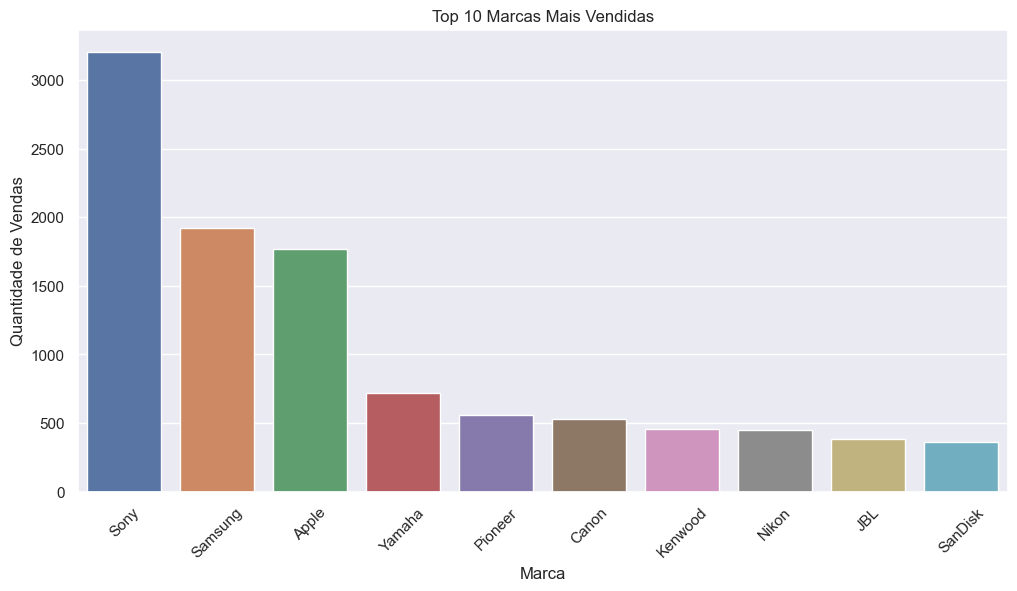

In [33]:
# Brands mais vendidas
aux = df4[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)


top_brands = aux.head(10)['brand'].tolist()

aux_top10 = aux[aux['brand'].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.barplot(x='brand', y='date_imp_d', data=aux_top10, hue='brand')
plt.xticks(rotation=45)
plt.title('Top 10 Marcas Mais Vendidas')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')
plt.show()

Text(0, 0.5, 'Quantidade de Vendas')

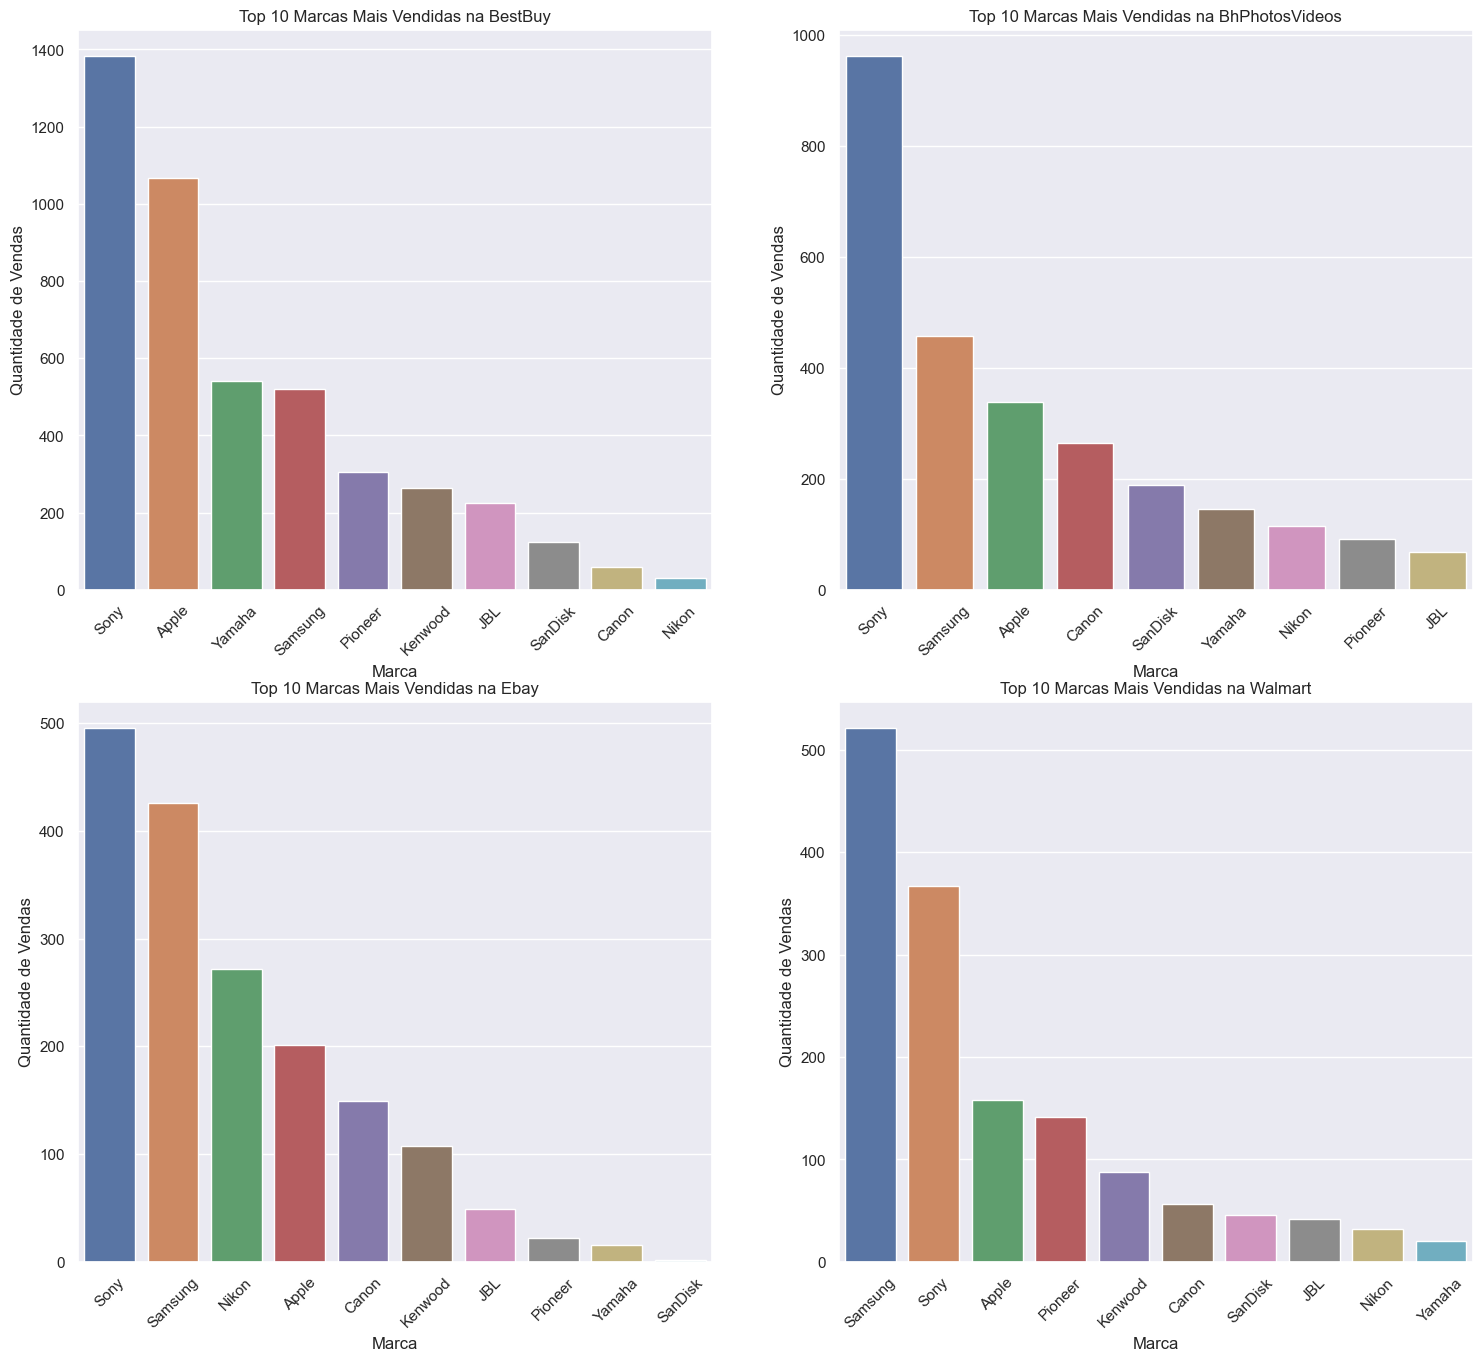

In [34]:
# Marca mais vendida por loja
plt.figure(figsize=(18,16))

plt.subplot(2,2,1)
aux = df_best[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
top_brands_best = aux.head(10)['brand'].tolist()
aux_top10_best = aux[aux['brand'].isin(top_brands)]
sns.barplot(x='brand', y='date_imp_d', data=aux_top10_best, hue='brand')
plt.xticks(rotation=45)
plt.title('Top 10 Marcas Mais Vendidas na BestBuy')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,2)
aux = df_bhphoto[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
top_brands_bh = aux.head(10)['brand'].tolist()
aux_top10_bh = aux[aux['brand'].isin(top_brands)]
sns.barplot(x='brand', y='date_imp_d', data=aux_top10_bh, hue='brand')
plt.xticks(rotation=45)
plt.title('Top 10 Marcas Mais Vendidas na BhPhotosVideos')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,3)
aux = df_ebay[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
top_brands_ebay = aux.head(10)['brand'].tolist()
aux_top10_ebay = aux[aux['brand'].isin(top_brands)]
sns.barplot(x='brand', y='date_imp_d', data=aux_top10_ebay, hue='brand')
plt.xticks(rotation=45)
plt.title('Top 10 Marcas Mais Vendidas na Ebay')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,4)
aux = df_walmart[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
top_brands_walmart = aux.head(10)['brand'].tolist()
aux_top10_walmart = aux[aux['brand'].isin(top_brands)]

sns.barplot(x='brand', y='date_imp_d', data=aux_top10_walmart, hue='brand')
plt.xticks(rotation=45)
plt.title('Top 10 Marcas Mais Vendidas na Walmart')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')


### 4.1.4 Quais os dias que mais vendem?

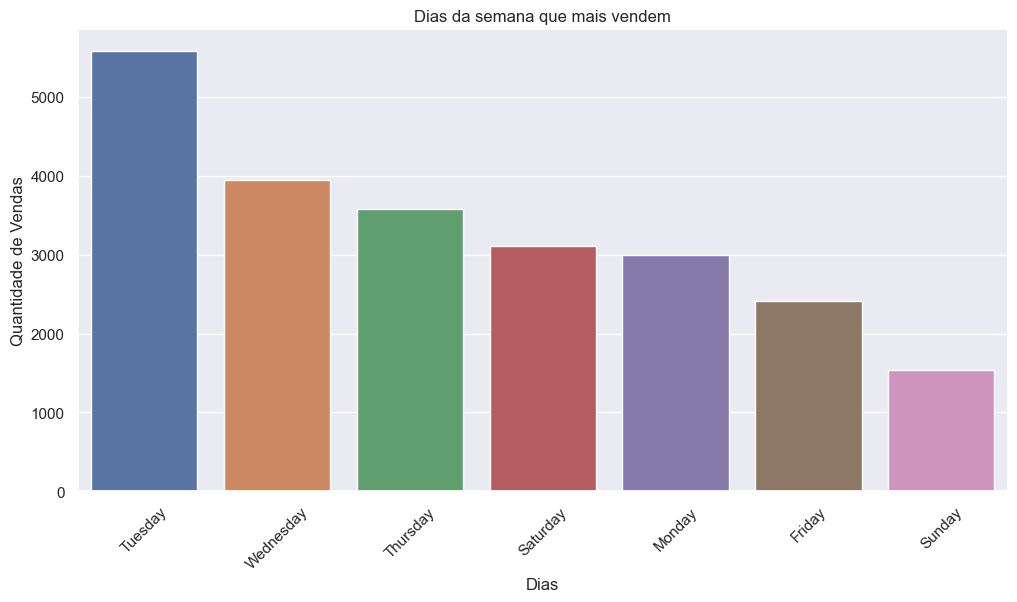

In [36]:
# Dias da semana que vendem
aux = df4[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x='day_n', y='date_imp_d', data=aux, hue='day_n')
plt.xticks(rotation=45)
plt.title('Dias da semana que mais vendem')
plt.xlabel('Dias')
plt.ylabel('Quantidade de Vendas')
plt.show()

Text(0, 0.5, 'Quantidade de Vendas')

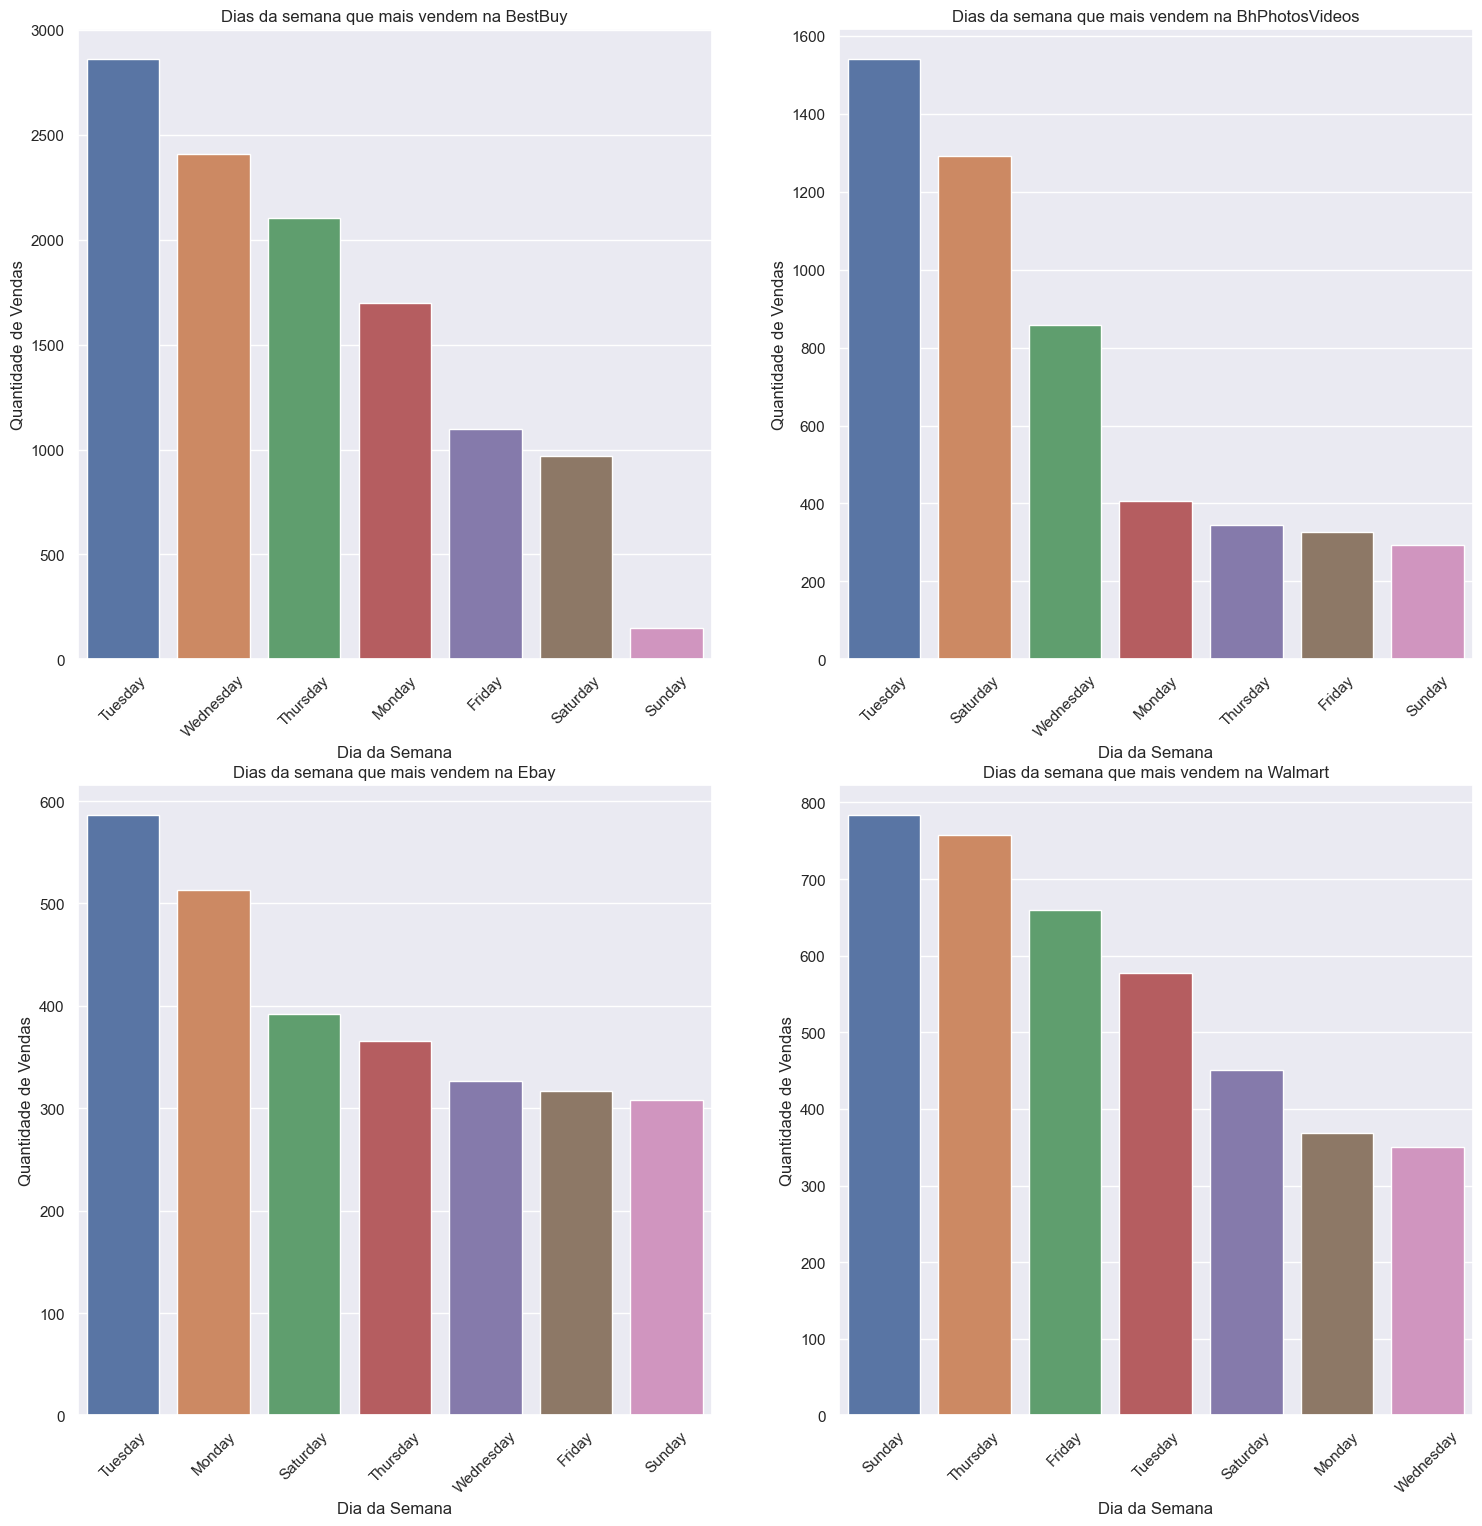

In [37]:
# Dias da semana que mais vendem por loja
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
aux1 = df_best[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='day_n', y='date_imp_d', data=aux1, hue='day_n')
plt.xticks(rotation=45)
plt.title('Dias da semana que mais vendem na BestBuy')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,2)
aux2 = df_bhphoto[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='day_n', y='date_imp_d', data=aux2, hue='day_n')
plt.xticks(rotation=45)
plt.title('Dias da semana que mais vendem na BhPhotosVideos')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,3)
aux3 = df_ebay[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='day_n', y='date_imp_d', data=aux3, hue='day_n')
plt.xticks(rotation=45)
plt.title('Dias da semana que mais vendem na Ebay')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,4)
aux4 = df_walmart[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='day_n', y='date_imp_d', data=aux4, hue='day_n')
plt.xticks(rotation=45)
plt.title('Dias da semana que mais vendem na Walmart')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Vendas')

- Possiveis motivos para maiores vendas na terça.
    - Deals of the day.
    - Salário semanal pago na sexta e o final de semana é usado para lazer e compras mais planejadas no decorrer do outro dia.


### 4.1.5 Meses que mais vendem

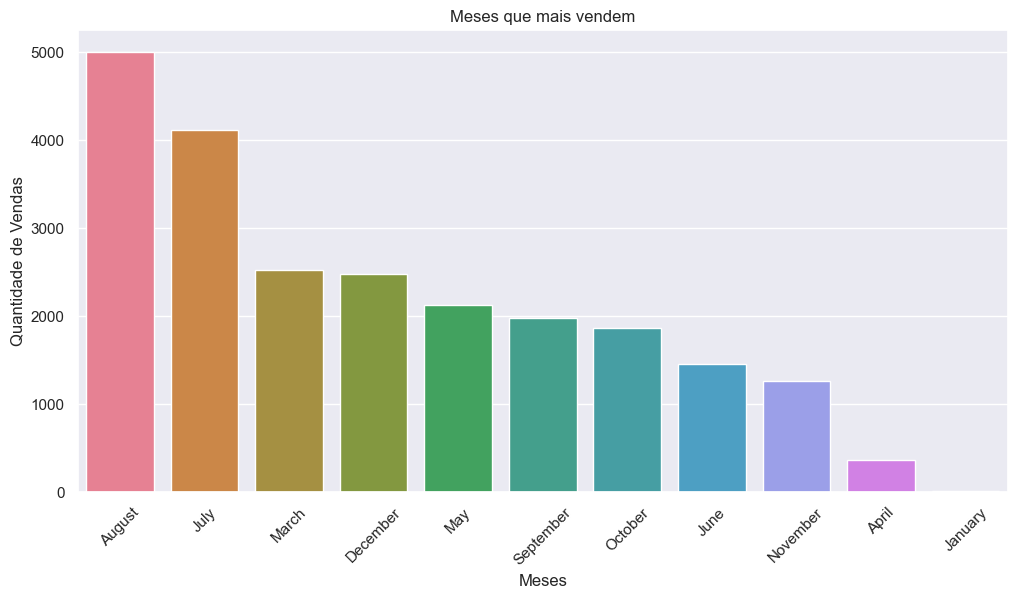

In [38]:
# Meses que mais vendem

aux = df4[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x='month_n', y='date_imp_d', data=aux, hue='month_n')
plt.xticks(rotation=45)
plt.title('Meses que mais vendem')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Vendas')
plt.show()

Text(0, 0.5, 'Quantidade de Vendas')

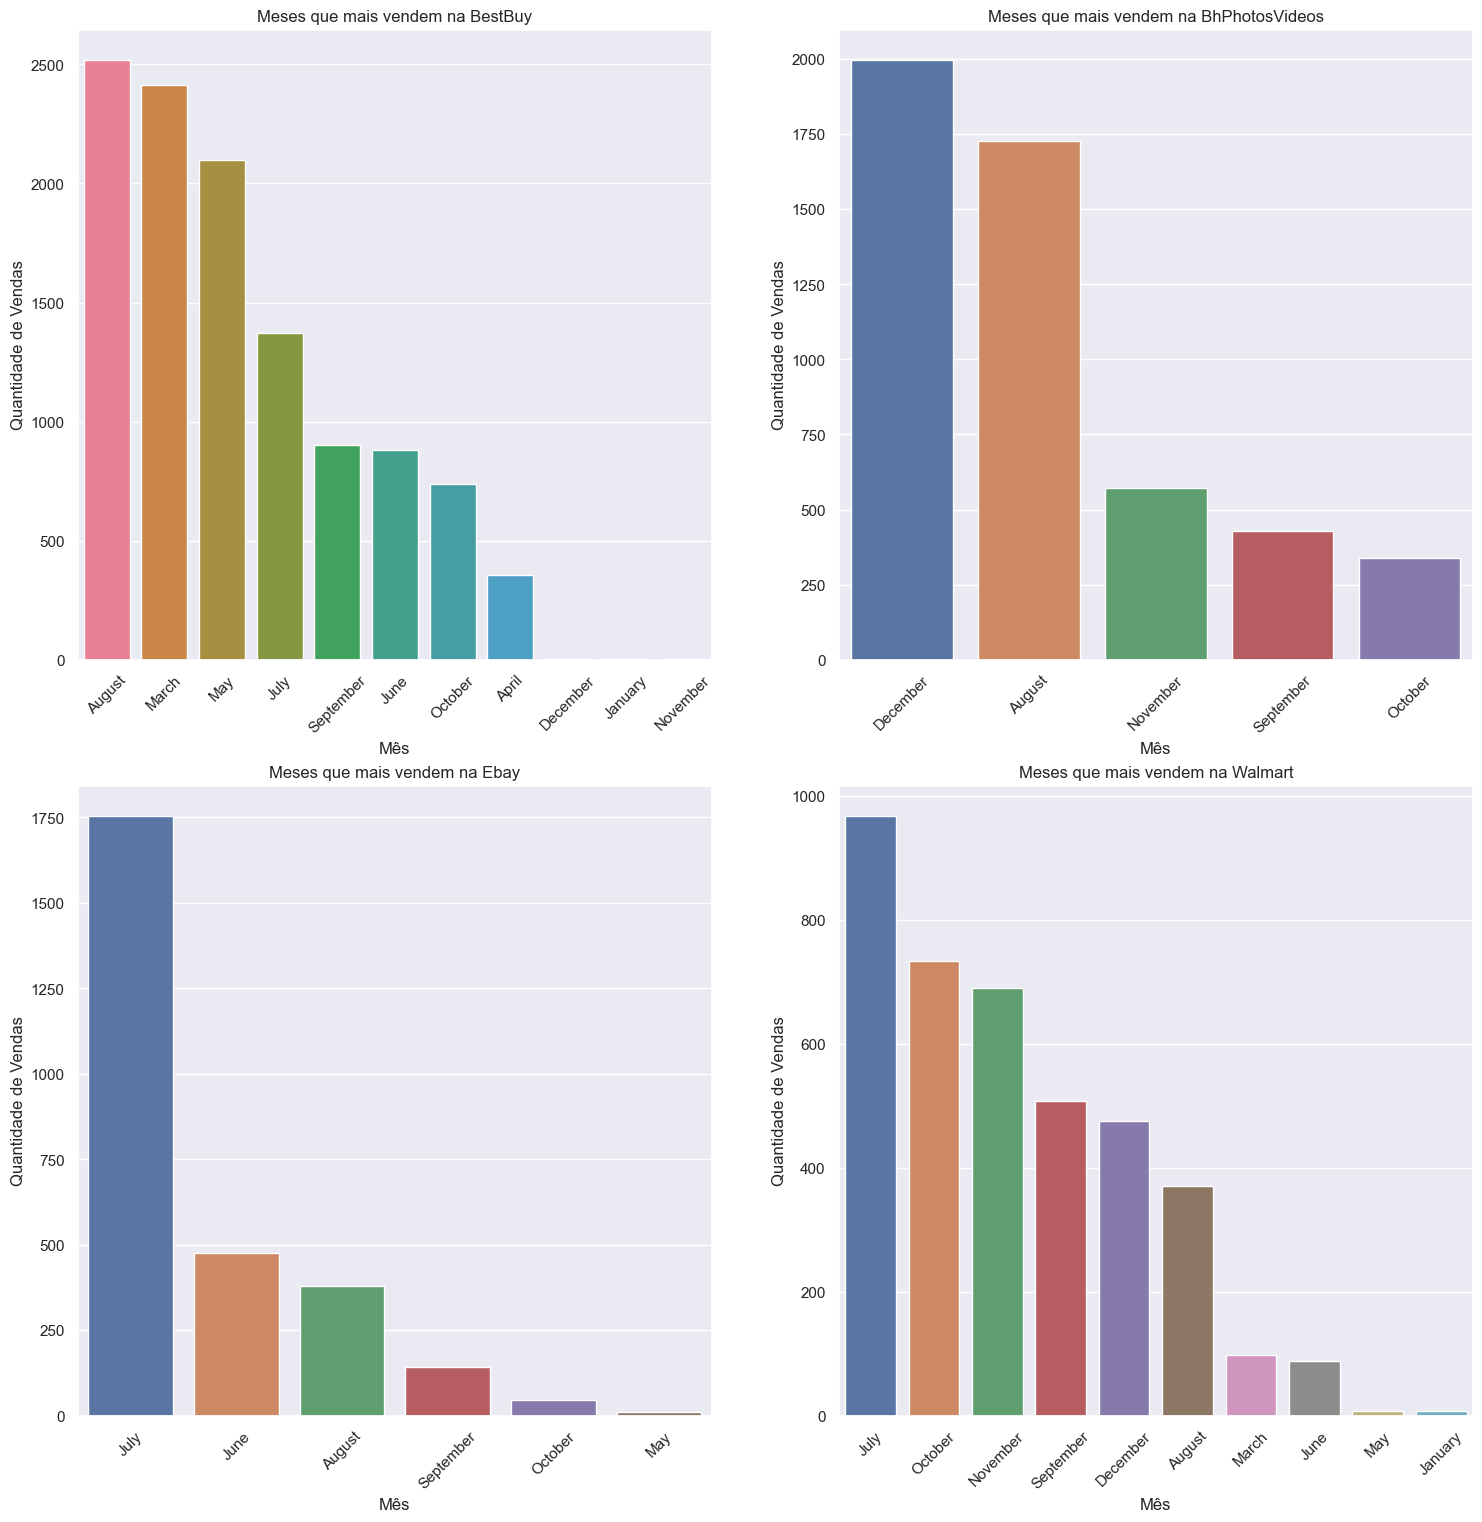

In [39]:
# Meses que mais vendem por loja

plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
aux1 = df_best[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='month_n', y='date_imp_d', data=aux1, hue='month_n')
plt.xticks(rotation=45)
plt.title('Meses que mais vendem na BestBuy')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,2)
aux2 = df_bhphoto[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='month_n', y='date_imp_d', data=aux2, hue='month_n')
plt.xticks(rotation=45)
plt.title('Meses que mais vendem na BhPhotosVideos')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,3)
aux3 = df_ebay[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='month_n', y='date_imp_d', data=aux3, hue='month_n')
plt.xticks(rotation=45)
plt.title('Meses que mais vendem na Ebay')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')


plt.subplot(2,2,4)
aux4 = df_walmart[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
sns.barplot(x='month_n', y='date_imp_d', data=aux4, hue='month_n')
plt.xticks(rotation=45)
plt.title('Meses que mais vendem na Walmart')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')

# 5.0 Data Preparation

# 6.0 Feature Selection